In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns

In [4]:
from sklearn.cluster import KMeans

In [5]:
df = pd.read_csv('data_h4_3337.csv')

In [6]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [9]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
#No, there are no missing values based on what we see presented above. There aren't any null values/missing values as all variables are sum of 0 for that

In [10]:
df.nunique()

CustomerID                200
Gender                      2
Age                        51
Annual Income (k$)         64
Spending Score (1-100)     84
dtype: int64

In [11]:
#There are a total of 200 different observations.
#Of those 200, 2 are for gender.
#51 are for Age
#64 are for Annual Income
#84 are for Spending Score
#These values represent the number of unique values in each column.

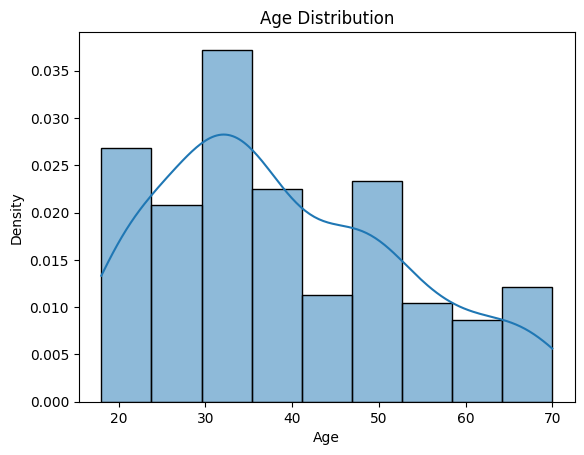

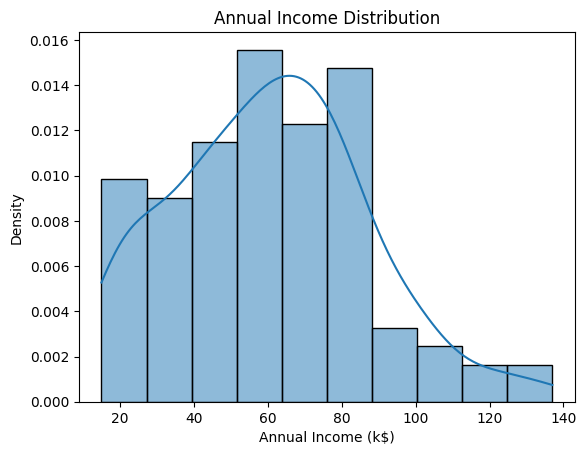

Text(0.5, 0, 'Spending Score (1-100)')

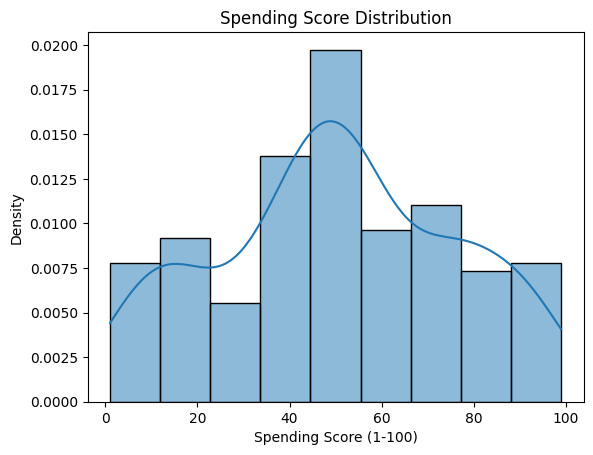

In [12]:
sns.histplot(data=df, x='Age', kde=True, stat='density')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.show()

sns.histplot(data=df, x='Annual Income (k$)', kde=True, stat='density')
plt.title('Annual Income Distribution')
plt.xlabel('Annual Income (k$)')
plt.show()

sns.histplot(data=df, x='Spending Score (1-100)', kde=True, stat='density')
plt.title('Spending Score Distribution')
plt.xlabel('Spending Score (1-100)')

In [ ]:
#I can conclude that the distribution looks scattered.
#While its scattered, it's also parabolic for how it's increasing and then decreasing.
#Peak comes in the middle ish.
#This helps with visualizing and it's a good idea to visualize more also.

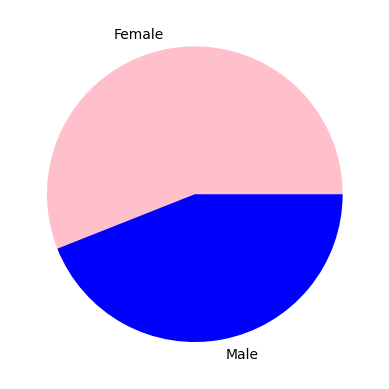

In [13]:
gender_tot = df['Gender'].value_counts()
plt.pie(gender_tot, labels = ['Female', 'Male'], colors = ['pink', 'blue'])
plt.show()

In [ ]:
#Female have a higher proportion than Male.

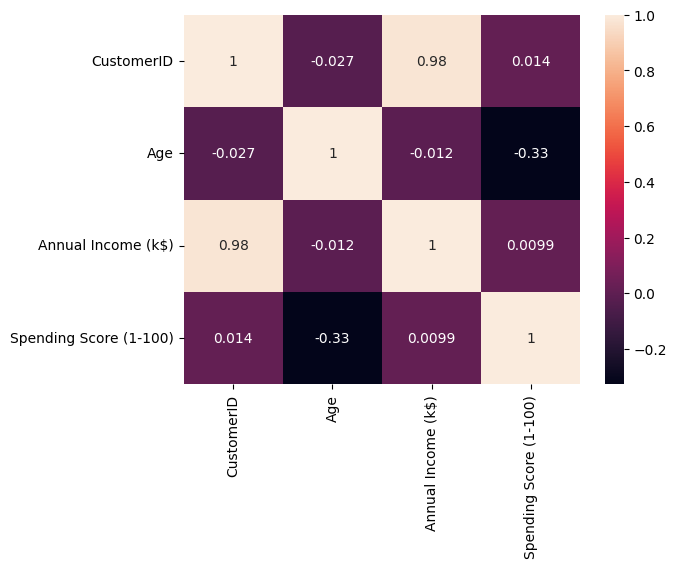

In [14]:
num_data = df.select_dtypes(include='number')
sns.heatmap(num_data.corr(),annot=True)
plt.show()

In [ ]:
#Based on the heatmap, the Spending Score variable and the Age variable have the most lowest correlations.
#Others do have instances of low correlation but not as much.
#CustomerID seems to have higher correlation.

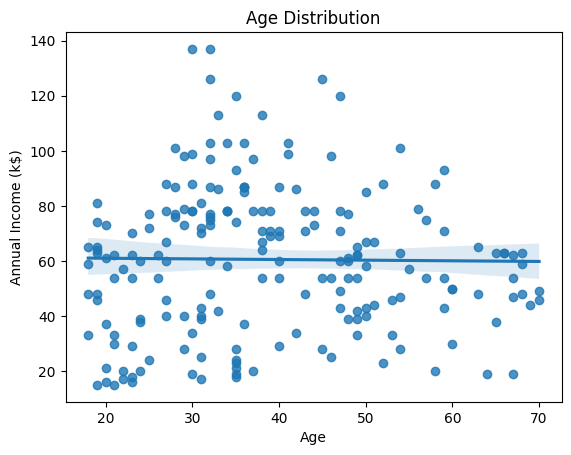

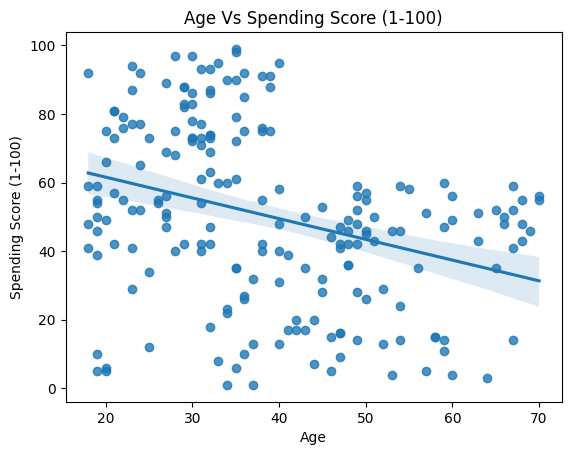

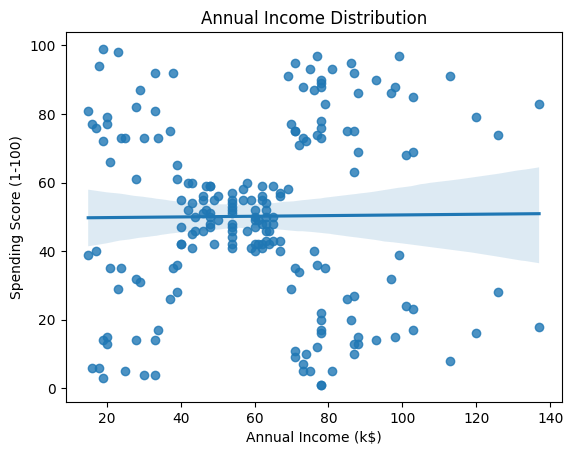

In [15]:
sns.regplot(data=df, x='Age', y='Annual Income (k$)')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.show()

sns.regplot(data=df, x='Age', y='Spending Score (1-100)')
plt.title('Age Vs Spending Score (1-100)')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.show()

sns.regplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)')
plt.title('Annual Income Distribution')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [ ]:
#Based on all the regression plots, all of them have scattered values somewhere in the plot.
#Alongside, Age versus Annual Income and Annual Income versus Spending Score have a steady or maintained slope.
#Age versus Spending Score has a decreasing linear slope.

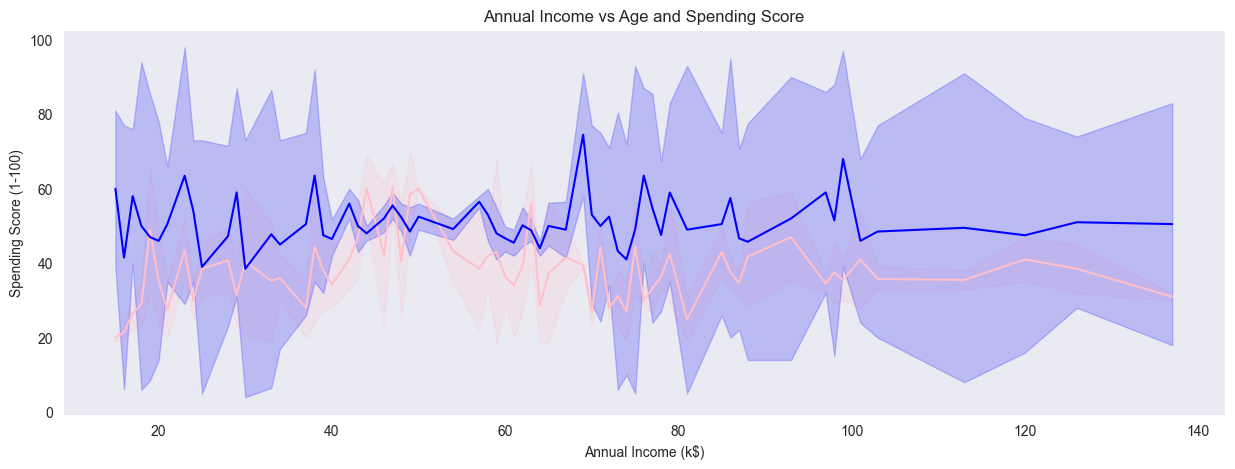

In [42]:
sns.set_style("dark")

plt.figure(figsize=(15,5))

sns.lineplot(data=df, x='Annual Income (k$)', y='Age', color='pink')
sns.lineplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', color='blue')
plt.title('Annual Income vs Age and Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [ ]:
#Age variability is high across all income levels
#As annual income gets higher and increases there begins to be more and more uncertainty taking place.

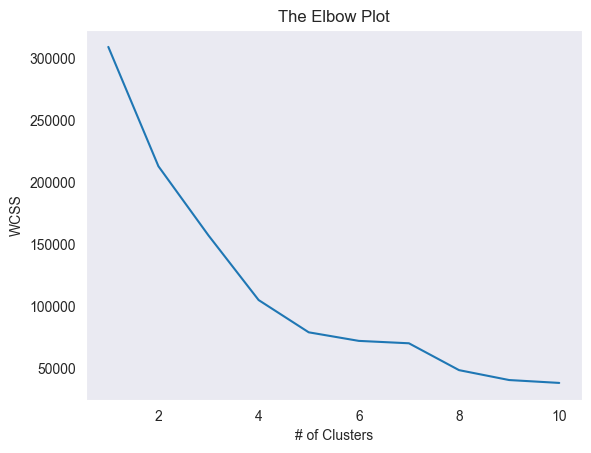

In [31]:
x = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].values

wcss = []
for i in range(1, 11):
    k_means = KMeans(n_clusters=i, init='k-means++', max_iter=50, random_state=50)
    k_means.fit(x)
    wcss.append(k_means.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('The Elbow Plot')
plt.xlabel('# of Clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
#There seems to be a decreasing slope because the # of Clusters increases, WCSS decreases more and more but at 8-10 clusters it begins to steady.

In [32]:
k_means = KMeans(n_clusters = 5, init = 'k-means++', n_init = 10,max_iter = 50, random_state = 50)

In [33]:
k_means.fit(x)

KMeans(max_iter=50, n_clusters=5, n_init=10, random_state=50)

In [34]:
import scipy.cluster.hierarchy as sch

In [35]:
import matplotlib.pyplot as plt

In [36]:
x = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].values

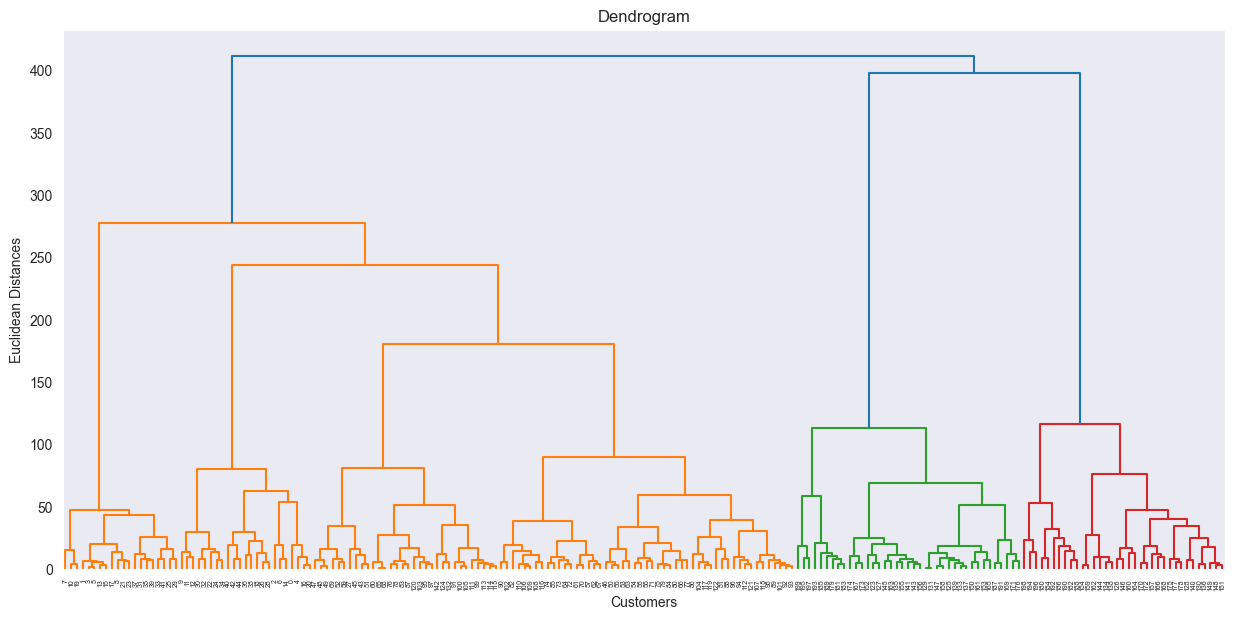

In [41]:
plt.figure(figsize=(15, 7))
dendrogram = sch.dendrogram(sch.linkage(x, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.show()

In [46]:
clustered_k = AgglomerativeClustering(n_clusters = 3, linkage='ward')
labels = clustered_k.fit_predict(x)

Text(0, 0.5, 'Spending Score (1-100)')

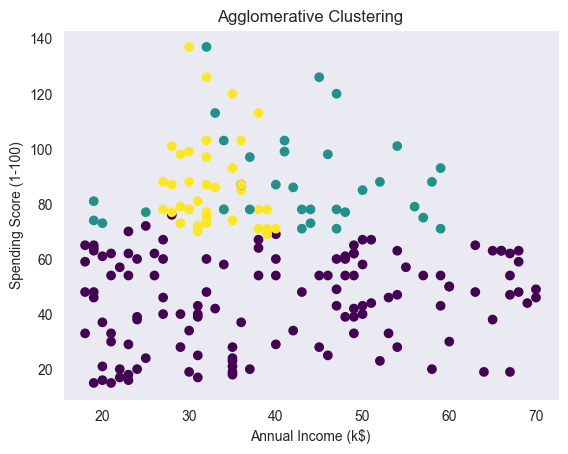

In [47]:
plt.scatter(x[:,0],x[:,1], c = labels, cmap = 'viridis')
plt.title('Agglomerative Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

In [ ]:
#Differences can be seen between both the clustering algorithms used, which were KMeans and Hierarchical Clustering.
#Both have similarities in the idea of datapoints being very scattered.